In [1]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [2]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/


# We then check a 2D dataset with size 224x224

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Let's take a look at larger image to get an impression
data_flag = 'dermamnist'
download = True

NUM_EPOCHS = 3# how many times of loop
BATCH_SIZE = 128# on each loop, the batch size
lr = 0.001#learning rate to be determined

info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

#prossessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download, size=224, mmap_mode='r')
val_dataset=DataClass(split='val', transform=data_transform, download=download, size=224, mmap_mode='r')
# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

Using downloaded and verified file: C:\Users\Lenovo\.medmnist\dermamnist_224.npz
Using downloaded and verified file: C:\Users\Lenovo\.medmnist\dermamnist_224.npz


In [5]:
x, y = train_dataset[0]

print(x, y)# y is the label of the image, and x is the representation of the image

tensor([[[ 0.1843,  0.1843,  0.1686,  ...,  0.3961,  0.4039,  0.4039],
         [ 0.2000,  0.2000,  0.1843,  ...,  0.4039,  0.4196,  0.4039],
         [ 0.2157,  0.2157,  0.2078,  ...,  0.4196,  0.4118,  0.3961],
         ...,
         [ 0.3020,  0.3098,  0.3255,  ...,  0.4510,  0.4588,  0.4667],
         [ 0.2941,  0.3020,  0.3098,  ...,  0.4431,  0.4275,  0.4353],
         [ 0.3020,  0.3020,  0.3020,  ...,  0.4510,  0.4275,  0.4196]],

        [[-0.2157, -0.2000, -0.1765,  ...,  0.1922,  0.2000,  0.2000],
         [-0.1843, -0.1686, -0.1373,  ...,  0.2078,  0.2078,  0.1922],
         [-0.1686, -0.1451, -0.1137,  ...,  0.2157,  0.2000,  0.1843],
         ...,
         [ 0.0275,  0.0431,  0.0588,  ...,  0.2078,  0.2000,  0.2000],
         [ 0.0275,  0.0353,  0.0431,  ...,  0.2157,  0.1765,  0.1608],
         [ 0.0353,  0.0353,  0.0275,  ...,  0.2235,  0.1686,  0.1451]],

        [[-0.2078, -0.2000, -0.1843,  ...,  0.2627,  0.2706,  0.2706],
         [-0.1608, -0.1451, -0.1373,  ...,  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


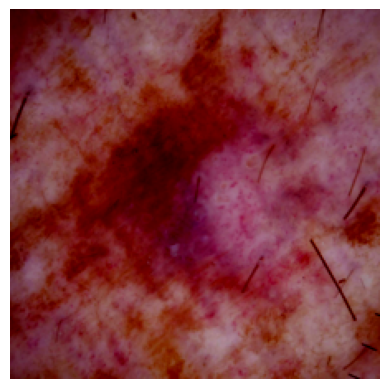

In [6]:
#to take a look at training data with label 0
number_0=0
for image in train_dataset:
    if image[1]==0:
        plt.figure()
        plt.imshow((np.transpose(image[0],(1,2,0))))
        number_0=number_0+1
        plt.axis('off')
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


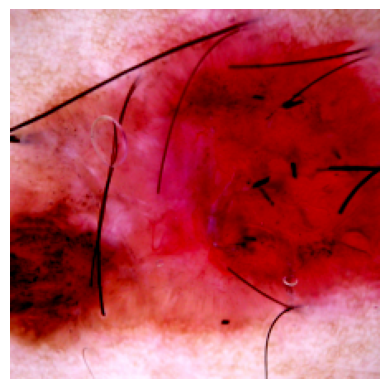

In [7]:
number_1=0
for image in train_dataset:
    if image[1]==1:
        plt.figure()
        plt.imshow((np.transpose(image[0],(1,2,0))))
        number_1=number_1+1
        plt.axis('off')
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


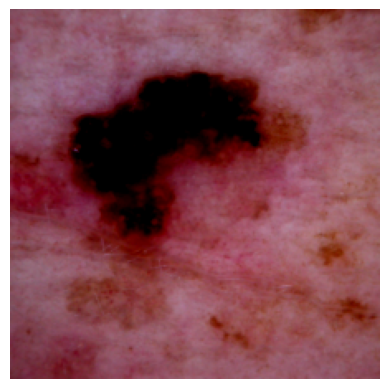

In [8]:
# are there any difference here hh
number_2=0
for image in train_dataset:
    if image[1]==2:
        plt.figure()
        plt.imshow((np.transpose(image[0],(1,2,0))))
        plt.axis('off')
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


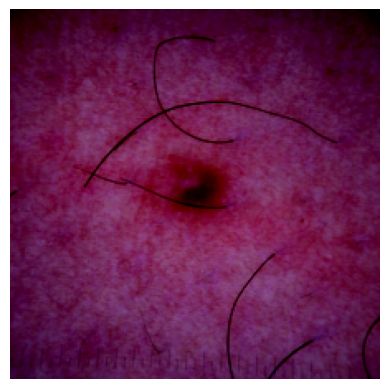

In [9]:
# are there any difference here hh
number_3=0
for image in train_dataset:
    if image[1]==3:
        plt.figure()
        plt.imshow((np.transpose(image[0],(1,2,0))))
        plt.axis('off')
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


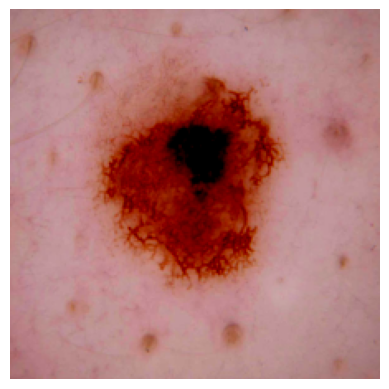

In [10]:
# are there any difference here hh
number_4=0
for image in train_dataset:
    if image[1]==4:
        plt.figure()
        plt.imshow((np.transpose(image[0],(1,2,0))))
        plt.axis('off')
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


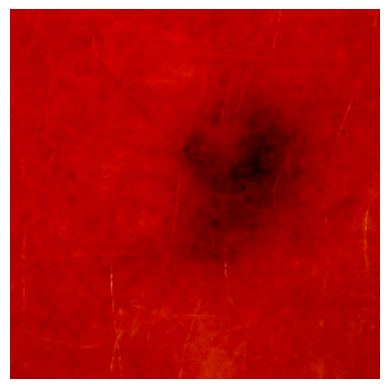

In [11]:
# are there any difference here hh
number_5=0
for image in train_dataset:
    if image[1]==5:
        plt.figure()
        plt.imshow((np.transpose(image[0],(1,2,0))))
        plt.axis('off')
        break

In [12]:
'''from skimage.filters import gaussian
# are there any difference here hh
number_6=0
for image in train_dataset:
    if image[1]==6:
        plt.figure()
        plt.imshow((np.transpose(image[0],(1,2,0))))
        filtered_img = gaussian(image[0], sigma=1, channel_axis=-1,multichannel=True)
        plt.imshow(filtered_img)
        plt.axis('off')
        break'''

"from skimage.filters import gaussian\n# are there any difference here hh\nnumber_6=0\nfor image in train_dataset:\n    if image[1]==6:\n        plt.figure()\n        plt.imshow((np.transpose(image[0],(1,2,0))))\n        filtered_img = gaussian(image[0], sigma=1, channel_axis=-1,multichannel=True)\n        plt.imshow(filtered_img)\n        plt.axis('off')\n        break"

In [13]:
print(len(train_dataset))

7007


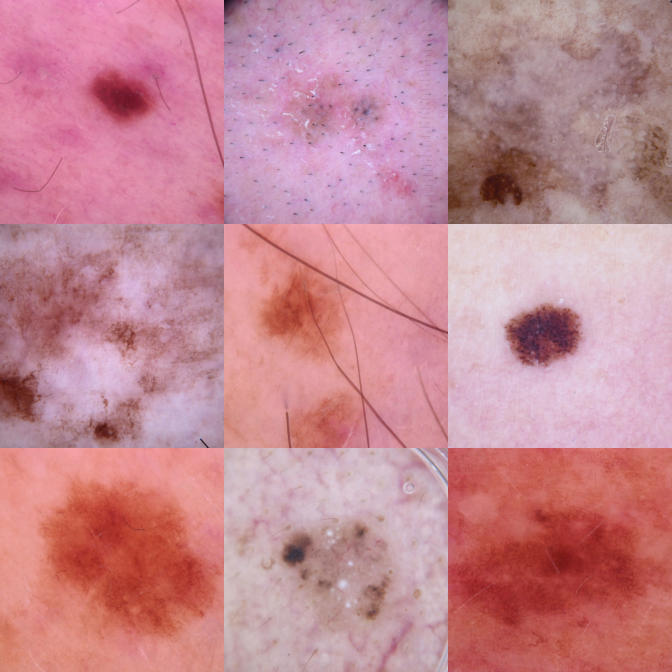

In [14]:
train_dataset.montage(length=3)

# Data Preprocessing

Here we try to do some data augmentation using flipping as there are not enough instances in some classes here.

In [15]:
from PIL import Image
from skimage.color import rgb2gray

In [16]:
augmented_data=[]

In [17]:
for image in train_dataset:
    if image[1]==0:
        image_augmented= image[0].permute(1, 2, 0)  # turn the image representation into shape(m,n,3)
        image_augmented = rgb2gray(image_augmented)
        image_augmented=np.flip(image_augmented,axis=0)
        image_augmented=np.flip(image_augmented,axis=1)
        augmented_data.append([image_augmented,[0]])

In [18]:
for image in train_dataset:
    if image[1]==3:
        image_augmented= image[0].permute(1, 2, 0)  # turn the image representation into shape(m,n,3)
        image_augmented = rgb2gray(image_augmented)
        image_augmented_1=np.flip(image_augmented,axis=1)
        image_augmented_2=np.flip(image_augmented,axis=0)
        augmented_data.append([image_augmented_1,[3]])
        augmented_data.append([image_augmented_2,[3]])

In [19]:
for image in train_dataset:
    if image[1]==6:
        image_augmented= image[0].permute(1, 2, 0)  # turn the image representation into shape(m,n,3)
        image_augmented = rgb2gray(image_augmented)
        image_augmented_1=np.flip(image_augmented,axis=1)
        image_augmented_2=np.flip(image_augmented,axis=0)
        augmented_data.append([image_augmented_1,[6]])
        augmented_data.append([image_augmented_2,[6]])

In [20]:
train_dataset_aug = []

# 逐个转换图像并添加到新的数据集列表中
for image,label in train_dataset:
    image = image.permute(1,2,0)
    gray_image = rgb2gray(image)  # 转换图像为灰度
    label = label.item()
    train_dataset_aug.append((gray_image,label))  # 添加图像和标签的元组

# 接下来，添加增强后的图像
for image_augmented, label in augmented_data:
    train_dataset_aug.append((image_augmented, label))


In [21]:
print(train_dataset_aug[:1])

[(array([[-0.13012075, -0.11833331, -0.10370272, ...,  0.24057965,
         0.24842279,  0.24842279],
       [-0.10095055, -0.08859763, -0.06892155, ...,  0.25403377,
         0.2579326 ,  0.24224631],
       [-0.0852643 , -0.06730037, -0.04482665, ...,  0.26580554,
         0.25065494,  0.23496866],
       ...,
       [ 0.08691535,  0.10093496,  0.11775221, ...,  0.26120633,
         0.25500005,  0.2572322 ],
       [ 0.08468319,  0.09309182,  0.10150044, ...,  0.26458514,
         0.228673  ,  0.21968317],
       [ 0.09252633,  0.09252633,  0.08691535, ...,  0.27242827,
         0.22306201,  0.20456241]], dtype=float32), 0)]


In [22]:
print(len(train_dataset_aug))

7593


## Here we would do HOG on 224x224 dataset

In [23]:
#here we get the feature for each imgae in each class
import numpy as np
from sklearn.decomposition import PCA
from skimage.color import rgb2gray

### Try a different method to denoise the image first.  

In [24]:
import skimage.restoration
from torch.utils.data import DataLoader
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [25]:
def compute_hog_features_denoise(image, visualize=True, **kwargs):
    #image = image.permute(1, 2, 0)  # turn the image representation into shape(m,n,3)
    #image = rgb2gray(image)  # turn the image into a grayscale image

    # calculate the HOG feature
    image_denoise=skimage.restoration.denoise_tv_bregman(image,0.1)
    features, hog_image = hog(image_denoise, orientations=9, pixels_per_cell=(16, 16),
                          cells_per_block=(3, 3), visualize=True)

    # change the contrast mode
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return features, hog_image_rescaled


In [26]:
def extract_features_by_label_denoise(dataset):
    # initialize the dict for different classes of Derma
    features_dict = {}
    hog_images = {}

    #loader = DataLoader(dataset, batch_size=1, shuffle=False)

    for item in dataset:

        # DataLoader would return images and labels in each batch
        image = item[0]
        label = item[1]  # turn the label from tensor to integer
        if isinstance(label, list):  # 如果label是列表，则获取列表中的第一个元素作为键
            label = label[0]

        image_features,hog_image = compute_hog_features_denoise(image)

        # add a class if there's none of them here now.
        if label not in features_dict:
            features_dict[label] = []
            hog_images[label] = []

        # append the features and HOG images
        features_dict[label].append(image_features)
        hog_images[label].append(hog_image)

    # turn the feature array into ndarray
    for label in features_dict:
        features_dict[label] = np.array(features_dict[label])
        if hog_images[label]:
            hog_images[label] = np.array(hog_images[label])
        else:
            hog_images[label] = np.empty((0, 224, 224))

    return features_dict, hog_images

In [80]:
hog_dic,hog_images_denoised= extract_features_by_label_denoise(train_dataset_aug)

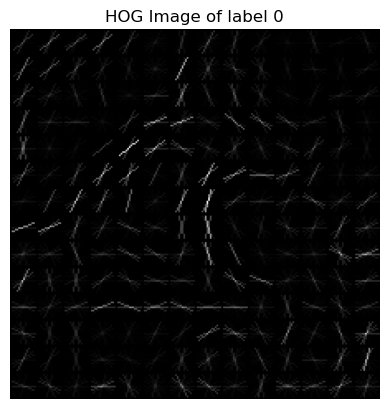

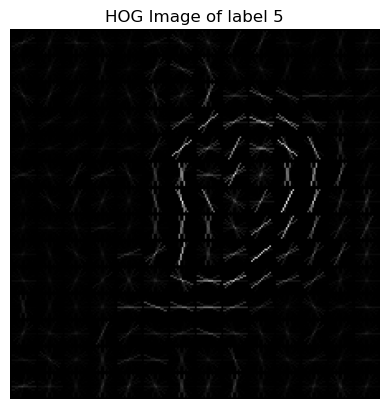

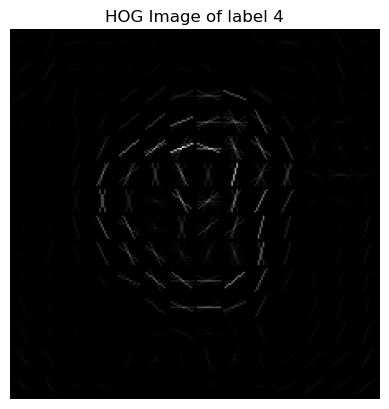

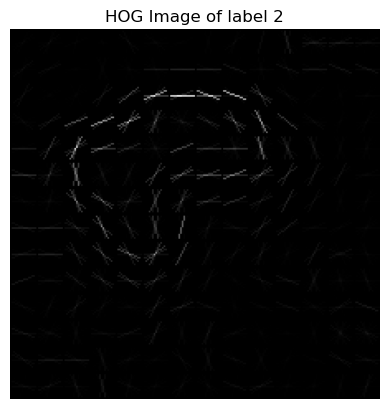

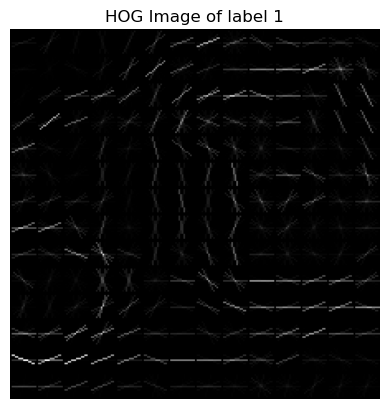

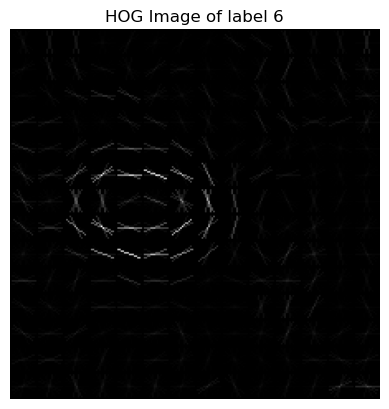

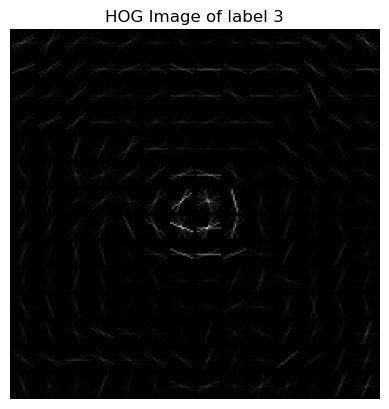

In [28]:
for label in hog_images_denoised.keys():
    if hog_images_denoised[label].size>0:  # to check if the first list is null
        plt.imshow(hog_images_denoised[label][0], cmap='gray')  # to show the first HOG image.
        plt.title(f'HOG Image of label {label}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No HOG images for label {label}")

using GLCM to get features


In [61]:
from skimage.feature import graycomatrix, graycoprops

In [62]:
def get_texture(image):
    image = image.permute(1, 2, 0)
    image =(255*rgb2gray(np.array(image)*0.5+0.5)).astype(int)
    distances = [10] # Offset
    angles = [np.pi/2]  # Vertical Direction
    glcm = graycomatrix(image, distances=distances,angles=angles,levels=256)
    # Calculate Features from GLCM
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast,dissimilarity,homogeneity,energy,correlation

In [63]:
features_contrasts={}
features_dissimilarties={}
features_homogeneities={}
features_energys={}
features_correlations={}

for image in train_dataset:#for every image
    if image[1][0] not in features_contrasts:
        features_contrasts[image[1][0]]=[]
        features_dissimilarties[image[1][0]]=[]
        features_homogeneities[image[1][0]]=[]
        features_energys[image[1][0]]=[]
        features_correlations[image[1][0]]=[]
    contrast,dissimilarity,homogeneity,energy,correlation=get_texture(image[0])
    features_contrasts[image[1][0]].append(contrast[0][0])
    features_dissimilarties[image[1][0]].append(dissimilarity[0][0])
    features_homogeneities[image[1][0]].append(homogeneity[0][0])
    features_energys[image[1][0]].append(energy[0][0])
    features_correlations[image[1][0]].append(correlation[0][0])

In [64]:
def get_texture_aug(image):
    image =(255*(image*0.5+0.5)).astype(int)
    distances = [10] # Offset
    angles = [np.pi/2]  # Vertical Direction
    glcm = graycomatrix(image, distances=distances,angles=angles,levels=256)
    # Calculate Features from GLCM
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast,dissimilarity,homogeneity,energy,correlation

In [65]:
contrasts=[]
dissimilarities=[]
homogeneities=[]
energys=[]
correlations=[]
for classes in features_contrasts.keys():
    contrasts=np.concatenate((contrasts,features_contrasts[classes]))
    print(classes)
    dissimilarities=np.concatenate((dissimilarities,features_dissimilarties[classes]))
    homogeneities=np.concatenate((homogeneities,features_homogeneities[classes]))
    energys=np.concatenate((energys,features_energys[classes]))
    correlations=np.concatenate((correlations,features_correlations[classes]))

0
5
4
2
1
6
3


In [82]:
glcm_features = np.hstack((contrasts, dissimilarities, homogeneities, energys, correlations))

In [84]:
print(glcm_features.shape)
print(glcm_features[0])


(35035,)
180.4506008010681


In [66]:
for classes in features_contrasts.keys():
    print(len(features_contrasts[classes]))

228
4693
779
769
359
99
80


In [67]:
print(len(contrasts))

7007


# Now we get the FFT features from the dataset

In [76]:
def fft_feature_aug(data):
    fft_features = []
    fft_feature_vectors = []
    
    for items in data:
        image = items[0]
        label = items[1]
        
        if isinstance(label, list):  
            label = label[0]

        # Calculate FFT
        fft_result = np.fft.fft2(image)

        # centered the result of FFT
        fft_centered = np.fft.fftshift(fft_result)

        # compute the spectrum of FFT
        magnitude_spectrum = np.abs(fft_centered)

        # energy
        energy = np.sum(magnitude_spectrum**2)

        # spectral entropy
        normalized_spectrum = magnitude_spectrum / np.sum(magnitude_spectrum)
        spectral_entropy = -np.sum(normalized_spectrum * np.log(normalized_spectrum + 1e-8))

        # use magnitude as feature vector
        magnitude_spectrum_flattened = magnitude_spectrum.flatten()

        # create feature vector
        fft_feature_vector = np.hstack([magnitude_spectrum_flattened, energy, spectral_entropy])
        fft_feature_vectors.append(fft_feature_vector)
        

        # append the features
    fft_feature_matrix = np.array(fft_feature_vectors)
    

    return fft_feature_matrix, np.array(label)

In [77]:
fft_dic, labels = fft_feature_aug(train_dataset_aug)

In [78]:
print(len(fft_feature_matrix))

7593


# Now we combined HOG,GLCM and FFT feature vectors

In [ ]:
# 创建一个新字典来存储合并后的特征
combined_features_dict = {}

# 假设所有字典中的标签都是一致的
for label in hog_dic:
    # 检查其他字典中是否存在相同的标签
    if label in fft_dic and label in glcm_features_dict:
        # 将特征向量堆叠成一个大的特征向量
        combined_feature_vector = np.hstack((hog_dic[label], fft_dic[label], glcm_features_dict[label]))
        combined_features_dict[label] = combined_feature_vector

### And here we use PCA again  

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
features_array=np.array(np.zeros((1,11664)))
for classes in features_dict_denoised_aug.keys():
    features_array=np.vstack((features_array,features_dict_denoised_aug[classes]))

In [ ]:
print(len(features_array_denoise))

In [ ]:
features_array_denoise=features_array[1:].copy()#refit including those augmented data

In [ ]:
pca_1= PCA(n_components=900)
pca_1.fit(features_array_denoise)

In [ ]:
print(sum(pca_1.explained_variance_ratio_))

In [ ]:
denoised_hog=pca_1.transform(features_array_denoise)# and those are features after PCA

In [ ]:
print(len(denoised_hog))

### And we need to use PCA to transform the features from validation dataset.  

In [ ]:
features_dict_denoised_val,hog_images_denoised_val= extract_features_by_label_denoise(val_dataset)

In [ ]:
features_array_val=np.array(np.zeros((1,11664)))
for classes in features_dict_denoised_val.keys():
    features_array_val=np.vstack((features_array_val,features_dict_denoised_val[classes]))

In [ ]:
features_array_val_denoise=features_array_val[1:].copy()

In [ ]:
denoised_hog_val=pca_1.transform(features_array_val_denoise)# and those are features after PCA

## Here we try to extract the texture feature.

In [ ]:
#think about it: maybe we should turn it into a grayscale image?
for image in train_dataset:#for every image
    for k in range(8):# we calculate different ks.
        sigma_k=k/2
        nabla_x=np.convolve(image,[-1,1])
        nabla_y=np.convolve(image,[[-1],[1]])
        nabla=np.zeros((image.shape[0],image.shape[1],2))
        nabla[:,:,0]=nabla_x
        nabla[:,:,1]=nabla_y
        gaussian=scipy.ndimage.gaussian_filter(image,sigma_k)
        M_matrix=gaussian*nabla@nabla.T
        for i in range(M_matrix.shape[0]):
            for j in range(M_matrix.shape[1]):
                val,vec=np.linalg.eig(M_matrix[i][j])
                vec_orien=vec[np.argsort(val)[-1]]
                n=[-vec_orien[1],vec_orien[0]]
                side_matrix=np.dot(nabla,n)
                G_matrix=gaussian[i-round(4*sigma_k)]


### Using GLCM to get texture.  

In [ ]:
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray

In [ ]:
def get_texture(image):
    image = image.permute(1, 2, 0)
    image =(255*rgb2gray(np.array(image)*0.5+0.5)).astype(int)
    distances = [10] # Offset
    angles = [np.pi/2]  # Vertical Direction
    glcm = graycomatrix(image, distances=distances,angles=angles,levels=256)
    # Calculate Features from GLCM
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast,dissimilarity,homogeneity,energy,correlation

In [ ]:
features_contrasts={}
features_dissimilarties={}
features_homogeneities={}
features_energys={}
features_correlations={}

for image in train_dataset:#for every image
    if image[1][0] not in features_contrasts:
        features_contrasts[image[1][0]]=[]
        features_dissimilarties[image[1][0]]=[]
        features_homogeneities[image[1][0]]=[]
        features_energys[image[1][0]]=[]
        features_correlations[image[1][0]]=[]
    contrast,dissimilarity,homogeneity,energy,correlation=get_texture(image[0])
    features_contrasts[image[1][0]].append(contrast[0][0])
    features_dissimilarties[image[1][0]].append(dissimilarity[0][0])
    features_homogeneities[image[1][0]].append(homogeneity[0][0])
    features_energys[image[1][0]].append(energy[0][0])
    features_correlations[image[1][0]].append(correlation[0][0])

In [ ]:
print(len(contrasts))

### Get GLCM for augmented data

In [ ]:
def get_texture_aug(image):
    image =(255*(image*0.5+0.5)).astype(int)
    distances = [10] # Offset
    angles = [np.pi/2]  # Vertical Direction
    glcm = graycomatrix(image, distances=distances,angles=angles,levels=256)
    # Calculate Features from GLCM
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast,dissimilarity,homogeneity,energy,correlation

In [ ]:
contrasts=[]
dissimilarities=[]
homogeneities=[]
energys=[]
correlations=[]
for classes in features_contrasts.keys():
    contrasts=np.concatenate((contrasts,features_contrasts[classes]))
    print(classes)
    dissimilarities=np.concatenate((dissimilarities,features_dissimilarties[classes]))
    homogeneities=np.concatenate((homogeneities,features_homogeneities[classes]))
    energys=np.concatenate((energys,features_energys[classes]))
    correlations=np.concatenate((correlations,features_correlations[classes]))

In [ ]:
for classes in features_contrasts.keys():
    print(len(features_contrasts[classes]))

In [ ]:
print(len(contrasts))

In [ ]:
print(len(augmented_data))

so contrasts,dissmilarities, homogeneities,energys, correlations are our features for texture.  

### Get GLCM features from validation dataset

In [ ]:
features_contrasts_val={}
features_dissimilarties_val={}
features_homogeneities_val={}
features_energys_val={}
features_correlations_val={}

for image in val_dataset:#for every image
    if image[1][0] not in features_contrasts_val:
        features_contrasts_val[image[1][0]]=[]
        features_dissimilarties_val[image[1][0]]=[]
        features_homogeneities_val[image[1][0]]=[]
        features_energys_val[image[1][0]]=[]
        features_correlations_val[image[1][0]]=[]
    contrast,dissimilarity,homogeneity,energy,correlation=get_texture(image[0])
    features_contrasts_val[image[1][0]].append(contrast[0][0])
    features_dissimilarties_val[image[1][0]].append(dissimilarity[0][0])
    features_homogeneities_val[image[1][0]].append(homogeneity[0][0])
    features_energys_val[image[1][0]].append(energy[0][0])
    features_correlations_val[image[1][0]].append(correlation[0][0])

In [ ]:
contrasts_val=[]
dissimilarities_val=[]
homogeneities_val=[]
energys_val=[]
correlations_val=[]
for classes in features_contrasts_val.keys():
    contrasts_val=np.concatenate((contrasts_val,features_contrasts_val[classes]))
    print(classes)
    dissimilarities_val=np.concatenate((dissimilarities_val,features_dissimilarties_val[classes]))
    homogeneities_val=np.concatenate((homogeneities_val,features_homogeneities_val[classes]))
    energys_val=np.concatenate((energys_val,features_energys_val[classes]))
    correlations_val=np.concatenate((correlations_val,features_correlations_val[classes]))

In [ ]:
for classes in features_contrasts_val.keys():
    print(len(features_contrasts_val[classes]))

# Here we would try a simple logistic regression classifier.  

## When we need to do data augmentaion first

In [ ]:
import pandas as pd

In [ ]:
import sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
X=pd.DataFrame(np.array(denoised_hog))

In [ ]:
X['contrasts']=contrasts
X['dissimilarities']=dissimilarities
X['homogeneities']=homogeneities
X['energys']=energys
X['correlations']=correlations

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(np.array(X))

In [ ]:
X=scaler.transform(np.array(X))

In [ ]:

y=np.vstack((np.zeros((684, 1)),5*np.ones((4693, 1)),4*np.ones((779, 1)),2*np.ones((769,1)),np.ones((359, 1)),
6*np.ones((297, 1)),
3*np.ones((240, 1))))


In [ ]:
!pip install imblearn

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=10000).fit(X, y.ravel())

In [ ]:
print(pd.DataFrame(np.array(confusion_matrix(y,clf.predict(X),labels=[0,1,2,3,4,5,6],normalize='true')),columns=[0,1,2,3,4,5,6]))

## Here we would try to make confusion_matrix based on our validation dataset  

In [ ]:
X_val=pd.DataFrame(np.array(denoised_hog_val))

In [ ]:
X_val['contrasts']=contrasts_val
X_val['dissimilarities']=dissimilarities_val
X_val['homogeneities']=homogeneities_val
X_val['energys']=energys_val
X_val['correlations']=correlations_val

In [ ]:
y_val=np.vstack((5*np.ones((671, 1)),4*np.ones((111, 1)),2*np.ones((110, 1)),
6*np.ones((14,1)),np.ones((52, 1)),
np.zeros((33, 1)),
3*np.ones((12, 1))))

In [ ]:
print(len(y_val))

In [ ]:
X_val=scaler.transform(np.array(X_val))

In [ ]:
print(pd.DataFrame(np.array(confusion_matrix(y_val,clf.predict(np.array(X_val)),labels=[0,1,2,3,4,5,6],normalize='true')),columns=[0,1,2,3,4,5,6]))

## Feature Extraction Using ResNet